In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math

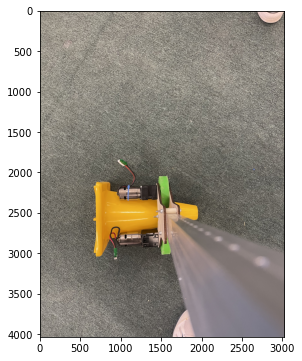

In [2]:
def find_cubes(image,
               lower_hsv_threshold=np.array([170, 50, 70]),
               upper_hsv_threshold=np.array([190, 255, 255]),
               contour_color=(255, 0, 0)):
    _img_with_contours = image.copy()
    _blur_img = cv2.GaussianBlur(image, (99, 99), 0)
    _hsv_image = cv2.cvtColor(_blur_img, cv2.COLOR_BGR2HSV)
    _current_mask = cv2.inRange(_hsv_image, lower_hsv_threshold, upper_hsv_threshold)
    _contours, _hierarchy = cv2.findContours(_current_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for _c in _contours:
        _M = cv2.moments(_c)
        _area = cv2.contourArea(_c)
        try:
            _cX = int((_M["m10"] / _M["m00"]))
            _cY = int((_M["m01"] / _M["m00"]))
        except:
            _cX = 0
            _cY = 0

        if _area >= 30000:
            print("area:", _area)

            cv2.drawContours(_img_with_contours, [_c], -1, (0, 255, 0), 11)
            cv2.putText(_img_with_contours, "cube", (_cX, _cY), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 255, 255), 11)
    return _img_with_contours


def find_cones(image,
               lower_hsv_threshold=np.array([70, 150, 50]),
               upper_hsv_threshold=np.array([110, 255, 255]),
               contour_color=(255, 0, 0)):
    _img_with_contours = image.copy()
    _blur_img = cv2.GaussianBlur(image, (199, 199), 0)
    _hsv_image = cv2.cvtColor(_blur_img, cv2.COLOR_BGR2HSV)
    _current_mask = cv2.inRange(_hsv_image, lower_hsv_threshold, upper_hsv_threshold)
    _contours, _hierarchy = cv2.findContours(_current_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for _c in _contours:
        _M = cv2.moments(_c)
        _area = cv2.contourArea(_c)
        try:
            _cX = int((_M["m10"] / _M["m00"]))
            _cY = int((_M["m01"] / _M["m00"]))
        except:
            _cX = 0
            _cY = 0

        if _area >= 30000:
            print("area:", _area)

            cv2.drawContours(_img_with_contours, [_c], -1, (0, 255, 0), 11)
            cv2.putText(_img_with_contours, "cone", (_cX, _cY), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 255, 255), 11)
    return _img_with_contours


img = mpimg.imread('cone1.jpg')
new_img = find_cubes(img)
plt.figure(figsize=(6, 6))
plt.imshow(new_img, cmap='gray')
plt.show()

In [3]:
def rotate_img(img, angle, scale):
    # find center of image
    (h, w) = img.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    
    # rotate image around center
    M = cv2.getRotationMatrix2D((cX, cY), angle, scale)
    rotated = cv2.warpAffine(img, M, (w, h))
    
    return rotated


def calc_dist(x1, x2, y1, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    dist = math.sqrt((dx ** 2) + (dy **2))
    
    return dist    


def detect_cone(img, low_thresh=np.array([90, 150, 150]), high_thresh=np.array([110, 255, 255]), cnt_color=(0, 255, 0), rect_color=(255, 0, 0)):
    # image that will be returned at end
    return_img = img.copy()
    
    # find contours of image
    blur_img = cv2.GaussianBlur(img, (49, 49), 0)
    hsv_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2HSV)
    mask_img = cv2.inRange(hsv_img, low_thresh, high_thresh)
    cnts, hierarchy = cv2.findContours(mask_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for i, c in enumerate(cnts):
        # find center of contour
        M = cv2.moments(c)
        try:
            cX = int((M["m10"] / M["m00"]))
            cY = int((M["m01"] / M["m00"]))
        except:
            cX = 0
            cY = 0
            
        # filter out small contours
        area = cv2.contourArea(c)
        if area >= 1000:
            # find the smallest rectangle around the contour
            rect = cv2.minAreaRect(c)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            
            # draw contour and rectangle
            cv2.drawContours(return_img, [c], -1, cnt_color, 2)
            cv2.drawContours(return_img, [box], -1, rect_color, 2)
            
            # lable rectangle vertices
            for j, b in enumerate(box):
                if j == 3:
                    dist = calc_dist(box[j][0], box[0][0], box[j][1], box[0][1])
                else:
                    dist = calc_dist(box[j][0], box[j+1][0], box[j][1], box[j+1][1])
                print(box[j][0])
                print (dist)
                
                cv2.putText(return_img, (str(box[j][0]) + ", " + str(box[j][1])), (box[j][0] - 35, box[j][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    
    return return_img

313
223.23530186778254
208
172.23530416264836
360
222.35332243976026
465
172.70784579746226
450
61.68468205316454
429
99.02019995940222
522
61.68468205316454
543
99.02019995940222


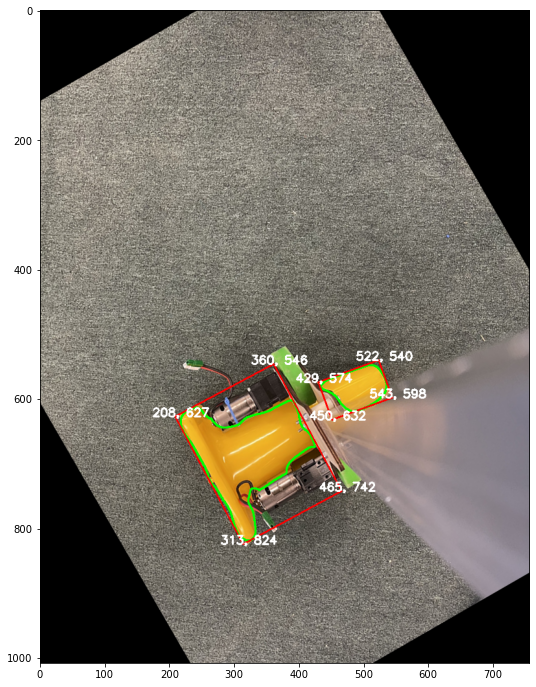

In [4]:
img = mpimg.imread('cone2_small.jpg')
rotated_img = rotate_img(img, 30, 1.0)
detected_img = detect_cone(rotated_img)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)
plt.show()